In [1]:
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)

    for i in range(N):
        dl_dw += -2*spendings[i]*(sales[i] - (w*spendings[i] + b))
        dl_db += -2*(sales[i] - (w*spendings[i] + b))
        
 # update w and b
    w = w - (1/float(N))*dl_dw*alpha
    b = b - (1/float(N))*dl_db*alpha
    return w, b

In [2]:
import pandas as pd
X = [1,2,5,9,3,4]
Y = [3,5,11,19,7,9]

data = {'X': X, 'Y': Y}

df = pd.DataFrame(data)
df

,X,Y
0,1,3
1,2,5
2,5,11
3,9,19
4,3,7
5,4,9


In [3]:
spendings = df['X']
sales = df['Y']
alpha = 0.001
epochs = 10

In [4]:
def avg_loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / float(N)

In [5]:
a = []
p = [] 
def train(spendings, sales, w, b, alpha, epochs):
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)
        q = avg_loss(spendings, sales, w, b)
        print("epoch:", e, "loss: ", q)
        a.append(e)
        p.append(q)
    return w, b

In [6]:
w = 0.0
b = 0.0
alpha = 0.001
epochs = 150
train(spendings, sales, w, b, alpha, epochs)

epoch: 0 loss:  97.84275007407409
epoch: 1 loss:  88.9161321992904
epoch: 2 loss:  80.80485434718291
epoch: 3 loss:  73.43444387899801
epoch: 4 loss:  66.7372304406136
epoch: 5 loss:  60.65172464607841
epoch: 6 loss:  55.12205351181195
epoch: 7 loss:  50.097447457894496
epoch: 8 loss:  45.53177416634097
epoch: 9 loss:  41.38311501647144
epoch: 10 loss:  37.61338020841177
epoch: 11 loss:  34.187959040975464
epoch: 12 loss:  31.075402132946795
epoch: 13 loss:  28.247132670074777
epoch: 14 loss:  25.67718402658787
epoch: 15 loss:  23.341961352196734
epoch: 16 loss:  21.22002493559226
epoch: 17 loss:  19.291893355387543
epoch: 18 loss:  17.539864611130593
epoch: 19 loss:  15.947853592099515
epoch: 20 loss:  14.501244391597092
epoch: 21 loss:  13.186756110766266
epoch: 22 loss:  11.99232091980174
epoch: 23 loss:  10.906973256974988
epoch: 24 loss:  9.92074914815166
epoch: 25 loss:  9.02459472240172
epoch: 26 loss:  8.210283083737123
epoch: 27 loss:  7.470338775733409
epoch: 28 loss:  6.7979

(2.100555807036239, 0.4281011372558398)

In [7]:
data2 = {'A':a,'B':p}
df2 = pd.DataFrame(data2)

In [8]:
df2

,A,B
0,0,97.842750
1,1,88.916132
2,2,80.804854
3,3,73.434444
4,4,66.737230
...,...,...
145,145,0.096668
146,146,0.096550
147,147,0.096432
148,148,0.096316


In [9]:
import matplotlib.pyplot as plt

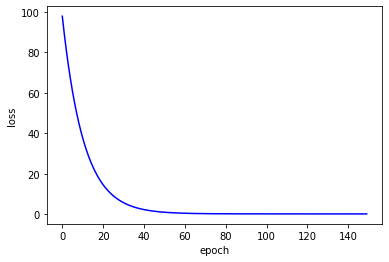

In [10]:
%matplotlib inline
plt.xlabel("epoch")
plt.ylabel("loss")
# plt.scatter(df.area,df.price, color="red", marker='+')
plt.plot(df2.A, df2.B,color = "blue")